In [2]:
pwd

'C:\\Users\\kshamaj\\Desktop\\DAV_Project'

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data1=pd.read_csv('RegressionCleanData.csv')

In [5]:
#data1

In [6]:
data1.describe()

,Unnamed: 0,App,Rating,Reviews,Size,Installs,Type,Price,ContentRating,cat_ART_AND_DESIGN,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
count,9360.000000,9360.000000,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000,...,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,5141.956731,3353.584722,3.443942,2.433226e+05,30.782318,6.950758e+06,0.763462,0.930860,1.216132,0.006197,...,0.029701,0.025214,0.025107,0.019124,0.018910,0.026389,0.067628,0.017094,0.012393,0.005449
std,3119.037964,2641.022890,1.661044,1.696794e+06,86.142397,4.567243e+07,0.424979,15.818286,1.075212,0.078478,...,0.169770,0.156782,0.156458,0.136968,0.136215,0.160297,0.251120,0.129629,0.110639,0.073618
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2453.500000,746.750000,3.500000,1.200000e+01,2.900000,1.000000e+03,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4884.000000,3177.500000,4.200000,6.250000e+02,11.000000,5.000000e+04,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7879.250000,5673.250000,4.500000,2.329450e+04,30.000000,1.000000e+06,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10840.000000,8189.000000,5.000000,4.489389e+07,994.000000,1.000000e+09,1.000000,400.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


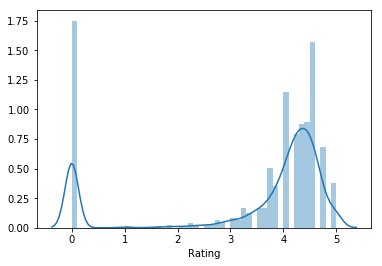

In [7]:
sns.distplot(data1['Rating'])

In [8]:
#Correlation heatmap

In [9]:
X = data1[['App','Category','Reviews','Size','Installs','Type','Price','ContentRating']]

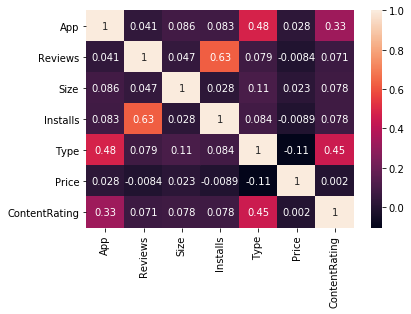

In [10]:
sns.heatmap(X.corr(),annot=True)

In [11]:
#first Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [13]:
X_val = data1.drop(labels = ['Category','Rating','Genres','LastUpdated','CurrentVer','AndroidVer','Unnamed: 0'],axis = 1)
y_val=data1['Rating']

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_val, y_val, test_size=0.2)

In [15]:
lm1=sm.OLS(y_train,X_train).fit()


In [54]:
#lm1.summary()


In [14]:
lm1.rsquared

0.983925361999154

In [15]:
#stepWise regression

In [16]:
#removing installs

In [16]:
STW_X_val = data1.drop(labels = ['Category','Rating','Genres','LastUpdated','CurrentVer','AndroidVer','Unnamed: 0','Installs'],axis = 1)
STW_y_val=data1['Rating']

In [17]:
X_train_stw, X_test_stw, y_train_stw, y_test_stw = train_test_split( STW_X_val, STW_y_val, test_size=0.2)

In [18]:
lm2=sm.OLS(y_train_stw,X_train_stw).fit()

In [19]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.171e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:31:57   Log-Likelihood:                         -5199.2
No. Observations:                7488   AIC:                                  1.048e+04
Df Residuals:                    7449   BIC:                                  1.075e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
App                      7.668e-06   2.65e-06      2.897      0.004    2.48e-06    1.29e-05
Reviews                  1.936e-08   3.24e-09      5.972      0.000     1.3e-08    2.57e-08
Size                       -0.0001   6.67e-05     -1.962      0.050      -0.000   -1.13e-07
Type                       -0.0891      0.025     -3.573      0.000      -0.138      -0.040
Price                      -0.0010      0.000     -2.582      0.010      -0.002      -0.000
ContentRating               0.0054      0.007      0.776      0.438      -0.008       0.019
cat_ART_AND_DESIGN          4.4448      0.077     57.699      0.000       4.294       4.596
cat_AUTO_AND_VEHICLES       4.2044      0.074     56.969      0.000       4.060       4.349
cat_BEAUTY                  4.3794      0.093     47.008      0.000       4.197       4.562
cat_BOOKS_AND_REFERENCE     4.3738      0.052     84.733      0.000       4.273       4.475
cat_BUSINESS                4.2042      0.044     95.523      0.000       4.118       4.290
cat_COMICS                  4.1493      0.083     50.036      0.000       3.987       4.312
cat_COMMUNICATION           4.1455      0.046     90.444      0.000       4.056       4.235
cat_DATING                  3.9751      0.053     75.051      0.000       3.871       4.079
cat_EDUCATION               4.4496      0.059     75.651      0.000       4.334       4.565
cat_ENTERTAINMENT           4.1880      0.066     63.095      0.000       4.058       4.318
cat_EVENTS                  4.5447      0.088     51.463      0.000       4.372       4.718
cat_FAMILY                  4.2363      0.030    139.980      0.000       4.177       4.296
cat_FINANCE                 4.1663      0.044     94.372      0.000       4.080       4.253
cat_FOOD_AND_DRINK          4.2100      0.065     64.740      0.000       4.083       4.337
cat_GAME                    4.2883      0.035    123.357      0.000       4.220       4.356
cat_HEALTH_AND_FITNESS      4.2963      0.045     94.505      0.000       4.207       4.385
cat_HOUSE_AND_HOME          4.1930      0.079     53.213      0.000       4.039       4.347
cat_LIBRARIES_AND_DEMO      4.3275      0.076     57.277      0.000       4.179       4.476
cat_LIFESTYLE               4.1440      0.043     97.409      0.000       4.061       4.227
cat_MAPS_AND_NAVIGATION     4.0366      0.063     63.586      0.000       3.912       4.161
cat_MEDICAL                 4.2178      0.038    111.242      0.000       4.144       4.292
cat_NEWS_AND_MAGAZINES      4.1919      0.052     80.687      0.000       4.090       4.294
cat_PARENTING               4.4488      0.088     50.746      0.000       4.277       4.621
cat_PERSONALIZATION         4.3498      

In [20]:
#Stepwise regression
#removing ContentRating

In [21]:
STW2_X_val = data1.drop(labels = ['Category','Rating','Genres','LastUpdated','CurrentVer','AndroidVer','Unnamed: 0','Installs','ContentRating'],axis = 1)
STW2_y_val=data1['Rating']

In [22]:
X_train_stw2, X_test_stw2, y_train_stw2, y_test_stw2 = train_test_split( STW2_X_val, STW2_y_val, test_size=0.2)

In [23]:
lm3=sm.OLS(y_train_stw2,X_train_stw2).fit()

In [24]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.190e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:32:02   Log-Likelihood:                         -5238.3
No. Observations:                7488   AIC:                                  1.055e+04
Df Residuals:                    7450   BIC:                                  1.082e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
App                      7.953e-06   2.66e-06      2.994      0.003    2.75e-06    1.32e-05
Reviews                  2.128e-08   3.45e-09      6.167      0.000    1.45e-08     2.8e-08
Size                       -0.0001    6.8e-05     -1.656      0.098      -0.000    2.07e-05
Type                       -0.0949      0.025     -3.773      0.000      -0.144      -0.046
Price                      -0.0008      0.000     -2.289      0.022      -0.002      -0.000
cat_ART_AND_DESIGN          4.4647      0.077     57.902      0.000       4.314       4.616
cat_AUTO_AND_VEHICLES       4.2591      0.075     56.595      0.000       4.112       4.407
cat_BEAUTY                  4.3589      0.091     48.043      0.000       4.181       4.537
cat_BOOKS_AND_REFERENCE     4.4071      0.052     84.397      0.000       4.305       4.510
cat_BUSINESS                4.1646      0.044     93.837      0.000       4.078       4.252
cat_COMICS                  4.2047      0.081     52.170      0.000       4.047       4.363
cat_COMMUNICATION           4.1578      0.046     91.014      0.000       4.068       4.247
cat_DATING                  4.0520      0.049     82.046      0.000       3.955       4.149
cat_EDUCATION               4.4439      0.060     74.377      0.000       4.327       4.561
cat_ENTERTAINMENT           4.1965      0.062     67.334      0.000       4.074       4.319
cat_EVENTS                  4.6073      0.097     47.719      0.000       4.418       4.797
cat_FAMILY                  4.2429      0.029    145.716      0.000       4.186       4.300
cat_FINANCE                 4.1883      0.043     97.171      0.000       4.104       4.273
cat_FOOD_AND_DRINK          4.1498      0.063     65.797      0.000       4.026       4.273
cat_GAME                    4.2993      0.032    135.325      0.000       4.237       4.362
cat_HEALTH_AND_FITNESS      4.2809      0.046     93.887      0.000       4.192       4.370
cat_HOUSE_AND_HOME          4.2058      0.079     53.446      0.000       4.052       4.360
cat_LIBRARIES_AND_DEMO      4.3207      0.078     55.219      0.000       4.167       4.474
cat_LIFESTYLE               4.2021      0.043     97.879      0.000       4.118       4.286
cat_MAPS_AND_NAVIGATION     4.1410      0.063     65.549      0.000       4.017       4.265
cat_MEDICAL                 4.2229      0.038    111.210      0.000       4.148       4.297
cat_NEWS_AND_MAGAZINES      4.2329      0.050     84.523      0.000       4.135       4.331
cat_PARENTING               4.3920      0.090     48.609      0.000       4.215       4.569
cat_PERSONALIZATION         4.3877      0.040    109.764      0.000       4.309       4.466
cat_PHOTOGRAPHY             4.2148      

In [25]:
#stepwise regression of size

In [26]:
STW3_X_val = data1.drop(labels = ['Category','Rating','Genres','LastUpdated','CurrentVer','AndroidVer','Unnamed: 0','Installs','ContentRating','Size'],axis = 1)
STW3_y_val=data1['Rating']

In [27]:
X_train_stw3, X_test_stw3, y_train_stw3, y_test_stw3 = train_test_split( STW3_X_val, STW3_y_val, test_size=0.2)

In [28]:
lm4=sm.OLS(y_train_stw3,X_train_stw3).fit()

In [29]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.252e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:32:06   Log-Likelihood:                         -5135.5
No. Observations:                7488   AIC:                                  1.035e+04
Df Residuals:                    7451   BIC:                                  1.060e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
App                      8.921e-06   2.62e-06      3.410      0.001    3.79e-06     1.4e-05
Reviews                  2.049e-08   3.47e-09      5.909      0.000    1.37e-08    2.73e-08
Type                       -0.1077      0.024     -4.426      0.000      -0.155      -0.060
Price                      -0.0012      0.000     -3.002      0.003      -0.002      -0.000
cat_ART_AND_DESIGN          4.4473      0.078     57.089      0.000       4.295       4.600
cat_AUTO_AND_VEHICLES       4.1794      0.075     55.460      0.000       4.032       4.327
cat_BEAUTY                  4.3486      0.091     48.038      0.000       4.171       4.526
cat_BOOKS_AND_REFERENCE     4.3871      0.052     84.555      0.000       4.285       4.489
cat_BUSINESS                4.1684      0.043     96.998      0.000       4.084       4.253
cat_COMICS                  4.2109      0.082     51.500      0.000       4.051       4.371
cat_COMMUNICATION           4.1775      0.044     94.405      0.000       4.091       4.264
cat_DATING                  4.0305      0.048     83.497      0.000       3.936       4.125
cat_EDUCATION               4.4457      0.057     77.486      0.000       4.333       4.558
cat_ENTERTAINMENT           4.1975      0.061     68.279      0.000       4.077       4.318
cat_EVENTS                  4.6212      0.100     46.263      0.000       4.425       4.817
cat_FAMILY                  4.2414      0.028    152.044      0.000       4.187       4.296
cat_FINANCE                 4.1873      0.042    100.180      0.000       4.105       4.269
cat_FOOD_AND_DRINK          4.1479      0.065     64.240      0.000       4.021       4.274
cat_GAME                    4.3124      0.031    141.142      0.000       4.253       4.372
cat_HEALTH_AND_FITNESS      4.2872      0.046     93.630      0.000       4.197       4.377
cat_HOUSE_AND_HOME          4.2194      0.077     54.507      0.000       4.068       4.371
cat_LIBRARIES_AND_DEMO      4.2845      0.075     57.275      0.000       4.138       4.431
cat_LIFESTYLE               4.1589      0.042     99.360      0.000       4.077       4.241
cat_MAPS_AND_NAVIGATION     4.0885      0.062     66.419      0.000       3.968       4.209
cat_MEDICAL                 4.2484      0.037    114.260      0.000       4.176       4.321
cat_NEWS_AND_MAGAZINES      4.1924      0.049     85.285      0.000       4.096       4.289
cat_PARENTING               4.3457      0.087     50.142      0.000       4.176       4.516
cat_PERSONALIZATION         4.3665      0.039    112.918      0.000       4.291       4.442
cat_PHOTOGRAPHY             4.2088      0.043     98.719      0.000       4.125       4.292
cat_PRODUCTIVITY            4.1987      

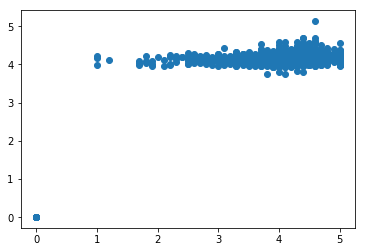

In [30]:
pred_model_ols=lm4.predict(X_test_stw3)#using  30% of independent variable test data to predict dependent variables
#values using our model and comparing it with the 30% of our y test data
plt.scatter(y_test_stw3,pred_model_ols)

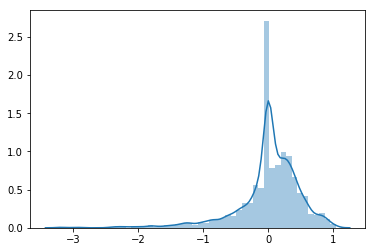

In [31]:
array_val_f1=np.array(y_test_stw3)
array_val_f2=np.array(pred_model_ols)
res_final=array_val_f1-array_val_f2
sns.distplot((res_final))

In [32]:
#qqplot

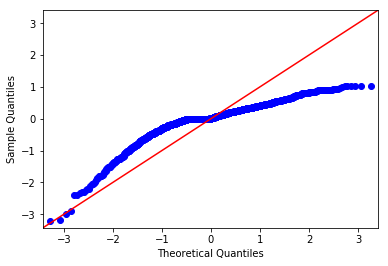

In [33]:
import scipy.stats as stats
import statsmodels.api as sm
import pylab
#stats.probplot(res_final, dist="norm", plot=pylab)
sm.qqplot(res_final, line='45')

pylab.show()

In [34]:
#errors

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_stw3,pred_model_ols ))
print('MSE:', metrics.mean_squared_error(y_test_stw3,pred_model_ols))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_stw3,pred_model_ols)))

MAE: 0.32848172389382196
MSE: 0.25280698361001436
RMSE: 0.5027991483783703


In [35]:
pred_v=lm4.predict

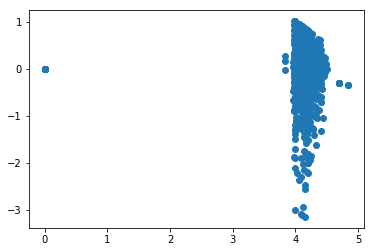

In [36]:
plt.scatter(pred_model_ols,res_final)

In [36]:
#Data transformation

In [37]:
data2=pd.read_csv('TransformedCleanData.csv')

In [38]:
data2

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,0,5805,ART_AND_DESIGN,4.1,159,19.0,10000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2134,ART_AND_DESIGN,3.9,967,14.0,500000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,7321,ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,6572,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0.0,4,...,0,0,0,0,0,0,0,0,0,0
4,4,5860,ART_AND_DESIGN,4.3,967,2.8,100000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,5732,ART_AND_DESIGN,4.4,167,5.6,50000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
6,6,6621,ART_AND_DESIGN,3.8,178,19.0,50000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
7,7,4400,ART_AND_DESIGN,4.1,36815,29.0,1000000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8,8,3882,ART_AND_DESIGN,4.4,13791,33.0,1000000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,4589,ART_AND_DESIGN,4.7,121,3.1,10000,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
trans_X_val = data2.drop(labels = ['Category','Rating','Genres','LastUpdated','CurrentVer','AndroidVer','Installs','ContentRating','Size'],axis = 1)
trans_y_val=data2['Rating']

In [40]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split( trans_X_val, trans_y_val, test_size=0.2)

In [41]:
lm5_trans=sm.OLS(y_train_trans,X_train_trans).fit()

In [22]:
lm5_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.229e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:17:05   Log-Likelihood:                         -5212.3
No. Observations:                7488   AIC:                                  1.050e+04
Df Residuals:                    7451   BIC:                                  1.075e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
App                      1.011e-05   2.65e-06      3.816      0.000    4.92e-06    1.53e-05
Reviews                  2.158e-08   3.52e-09      6.128      0.000    1.47e-08    2.85e-08
Type                       -0.0969      0.025     -3.871      0.000      -0.146      -0.048
Price                      -0.0011      0.000     -2.928      0.003      -0.002      -0.000
cat_ART_AND_DESIGN          4.4037      0.076     58.129      0.000       4.255       4.552
cat_AUTO_AND_VEHICLES       4.1895      0.077     54.611      0.000       4.039       4.340
cat_BEAUTY                  4.3477      0.092     47.458      0.000       4.168       4.527
cat_BOOKS_AND_REFERENCE     4.3758      0.052     83.438      0.000       4.273       4.479
cat_BUSINESS                4.2004      0.043     96.935      0.000       4.116       4.285
cat_COMICS                  4.1264      0.082     50.507      0.000       3.966       4.287
cat_COMMUNICATION           4.1541      0.044     93.369      0.000       4.067       4.241
cat_DATING                  4.0228      0.049     82.030      0.000       3.927       4.119
cat_EDUCATION               4.4332      0.059     75.294      0.000       4.318       4.549
cat_ENTERTAINMENT           4.1921      0.064     65.520      0.000       4.067       4.318
cat_EVENTS                  4.4992      0.089     50.515      0.000       4.325       4.674
cat_FAMILY                  4.2255      0.029    148.161      0.000       4.170       4.281
cat_FINANCE                 4.1981      0.044     96.422      0.000       4.113       4.283
cat_FOOD_AND_DRINK          4.1077      0.065     63.595      0.000       3.981       4.234
cat_GAME                    4.2902      0.031    136.362      0.000       4.228       4.352
cat_HEALTH_AND_FITNESS      4.2627      0.045     95.667      0.000       4.175       4.350
cat_HOUSE_AND_HOME          4.2287      0.081     52.251      0.000       4.070       4.387
cat_LIBRARIES_AND_DEMO      4.2785      0.075     57.045      0.000       4.132       4.426
cat_LIFESTYLE               4.1340      0.042     98.517      0.000       4.052       4.216
cat_MAPS_AND_NAVIGATION     4.0096      0.064     62.681      0.000       3.884       4.135
cat_MEDICAL                 4.2342      0.037    113.725      0.000       4.161       4.307
cat_NEWS_AND_MAGAZINES      4.2307      0.051     83.523      0.000       4.131       4.330
cat_PARENTING               4.4126      0.084     52.383      0.000       4.247       4.578
cat_PERSONALIZATION         4.3695      0.040    110.428      0.000       4.292       4.447
cat_PHOTOGRAPHY             4.1771      0.043     96.783      0.000       4.092       4.262
cat_PRODUCTIVITY            4.1702      

In [ ]:
#prediction


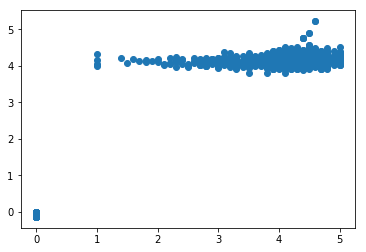

In [43]:
pred_model_transform=lm5_trans.predict(X_test_trans)#using  20% of independent variable test data to predict dependent variables
#values using our model and comparing it with the 20% of our y test data
plt.scatter(y_test_trans,pred_model_transform)

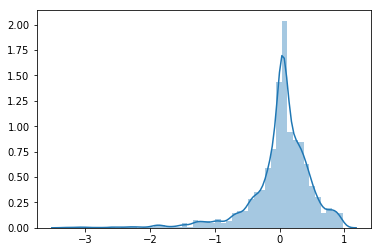

In [46]:
array_val_f1_trans=np.array(y_test_trans)
array_val_f2_trans=np.array(pred_model_transform)
res_final_trans=array_val_f1_trans-array_val_f2_trans
sns.distplot((res_final_trans))

In [ ]:
#random forest

In [50]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_val, y_val)
regressor.score(X_val,y_val)


0.985616488889085

In [53]:
# Predicting a new result
y_pred = regressor.predict(X_test)